# TP3 - Premiers CNN 

# MNIST 

L'objectif de cette première de TP est d'utiliser une architecture CNN pour reconnaître des chiffres manuscrits sur la base de données du MNIST (http://yann.lecun.com/exdb/mnist/). Pour rappel, la base de chiffres manuscrits comprend un ensemble de 60 000 exemples d'apprentissage  et un ensemble de 10 000 exemples de test.  Les chiffres, dont quelques exemples sont représentés sur la figure, ont été normalisés et centrés dans une image de taille fixe $28\times 28$ pixels. 

![mnist](https://www.ttested.com/gallery/thumbnails/ditch-mnist.jpg)




In [4]:
# import des librairies 
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from keras.models import Model, Sequential

from sklearn.model_selection import train_test_split


## Chargement des données

In [5]:
# Nombre de classes
num_classes = 10

# Chargement base d'apprentissage et de test 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train1,  X_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=False)

# Reshape des data pour les formatter en 28x28x1
X_train1 = X_train1.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1, 28,28,1)
x_test=x_test.reshape(-1, 28,28,1)

# normalisation 
X_train1 = X_train1.astype("float32") / 255
X_val=X_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Affichage de la nouvelle shape des données (maintenant sous forme de matrice 28x28)
print(X_train1.shape)
print(X_val.shape)
print(x_test.shape)

# Passer les labels en categorical
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


(54000, 28, 28, 1)
(6000, 28, 28, 1)
(10000, 28, 28, 1)


## Architecture CNN

In [13]:
# Création de l'architecture 
model = Sequential()

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 2)         20        
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                13530     
Total params: 13,550
Trainable params: 13,550
Non-trainable params: 0
_________________________________________________________________


## Entraînement 

In [ ]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(X_train1, y_train1,
          epochs=10,
          validation_data=(X_val, y_val),
          batch_size=16)

## Analyse des résultats 

In [ ]:
# Analyse des résultats 

def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

## Evaluation sur la base de test 

# Fashion-MNIST


Fashion-MNIST est un jeu de données d'images d'articles de Zalando (https://github.com/zalandoresearch/fashion-mnist), composé d'un ensemble d'apprentissage de 60 000 exemples et d'un ensemble de test de 10 000 exemples. Chaque exemple est une image en niveaux de gris de 28x28, associée à une étiquette parmi 10 classes. Zalando souhaite que Fashion-MNIST remplace directement le jeu de données MNIST original pour l'évaluation des algorithmes d'apprentissage automatique. Il partage la même taille d'image et la même structure de divisions de formation et de test.

![Fashion-mnist](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)



Le jeu de données MNIST original contient beaucoup de chiffres manuscrits. Les membres de la communauté de l'IA/ML/Science des données adorent ce jeu de données et l'utilisent comme référence pour valider leurs algorithmes. En fait, MNIST est souvent le premier jeu de données que les chercheurs essaient. "Si cela ne fonctionne pas sur MNIST, cela ne fonctionnera pas du tout", ont-ils dit. "Et si ça marche sur MNIST, ça peut encore échouer sur d'autres".

Zalando cherche à remplacer le jeu de données MNIST original.


## Description des données
1. Chaque image mesure 28 pixels de hauteur et 28 pixels de largeur, soit 784 pixels au total.
2. Chaque pixel est associé à une valeur unique, qui indique la clarté ou l'obscurité du pixel, les chiffres les plus élevés signifiant les plus sombres. Cette valeur de pixel est un nombre entier compris entre 0 et 255.
3. Les ensembles de données d'apprentissage et de test comportent 785 colonnes.
4.La première colonne est constituée des étiquettes de classe (voir ci-dessus) et représente l'article de vêtement.
5.Les autres colonnes contiennent les valeurs des pixels de l'image associée.


Pour localiser un pixel sur l'image, supposons que nous ayons décomposé x comme suit : x = i * 28 + j, où i et j sont des entiers compris entre 0 et 27. Le pixel est situé sur la ligne i et la colonne j d'une matrice 28 x 28. 


## Description des classes 

Chaque exemple d'apprentissage et de test est affecté à l'une des étiquettes suivantes :

0. T-shirt/top
1. Pantalon
2. Pull-over
3. Robe
4. Manteau
5. Sandale
6. Chemise
7. Sneakers
8. Sac
9. Botte 


## Chargement des données

In [ ]:
from keras.datasets import fashion_mnist

# Nombre de classes
num_classes = 10
targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", "Chemise", "Sneaker", "Sac", "Bottes"]

# Chargement base d'apprentissage et de test 
(images_train, y_train), (images_test, y_test) = fashion_mnist.load_data()

# normalisation 
#x_train = image_train.astype("float32") / 255
#x_test = image_test.astype("float32") / 255

# Passer les labels en categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [ ]:
print(images_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


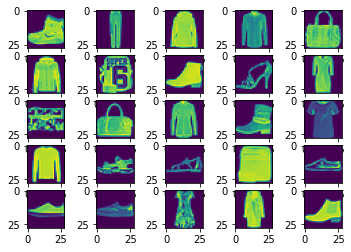

In [ ]:
# Quelques exemples 
for i in range(25):
    plt.subplot(5,5,i+1);
    h = plt.imshow(images_train[1000*i]);

# Architecture CNN

In [ ]:
# A vous de jouer !

# Entraînement

In [ ]:
# A vous de jouer !

# Analyse des résultats

In [ ]:
# A vous de jouer !